Actual columns: ['Size', 'Location', '  Rooms', 'Price']
Updated columns: ['Size', 'Location', 'Rooms', 'Price']
Shape: (700, 4)

Missing Values:
 Size        0
Location    0
Rooms       0
Price       0
dtype: int64

Data Types:
 Size         int64
Location    object
Rooms        int64
Price        int64
dtype: object

Summary Stats:
               Size       Rooms          Price
count   700.000000  700.000000     700.000000
mean   1802.201429    3.540000  427589.062857
std     690.170246    1.702426  164201.863467
min     601.000000    1.000000  113957.000000
25%    1225.750000    2.000000  292490.750000
50%    1744.000000    4.000000  415331.000000
75%    2385.250000    5.000000  541532.500000
max    2994.000000    6.000000  874266.000000


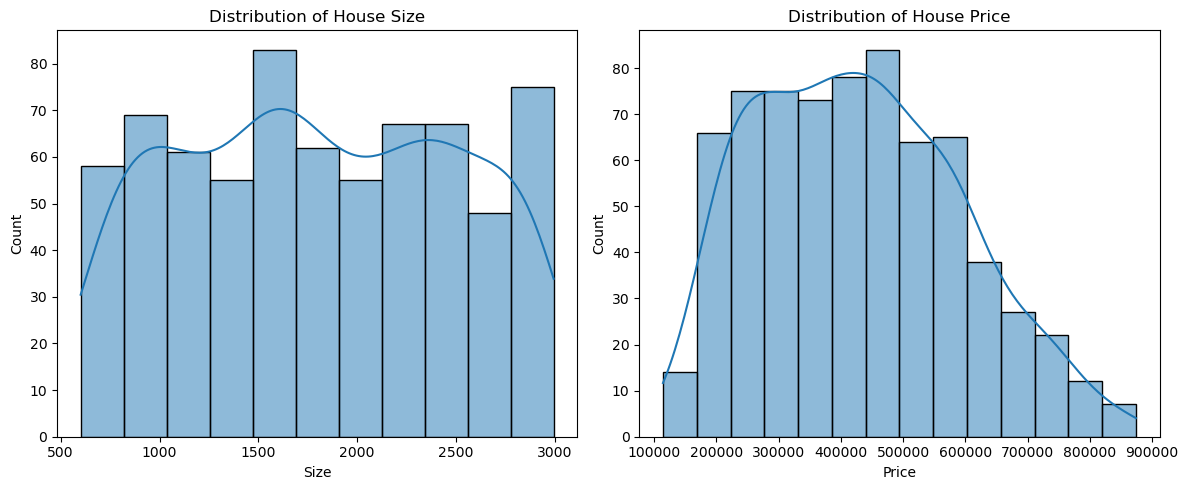


Model Evaluation:
RMSE: 41530.02
R² Score: 0.94


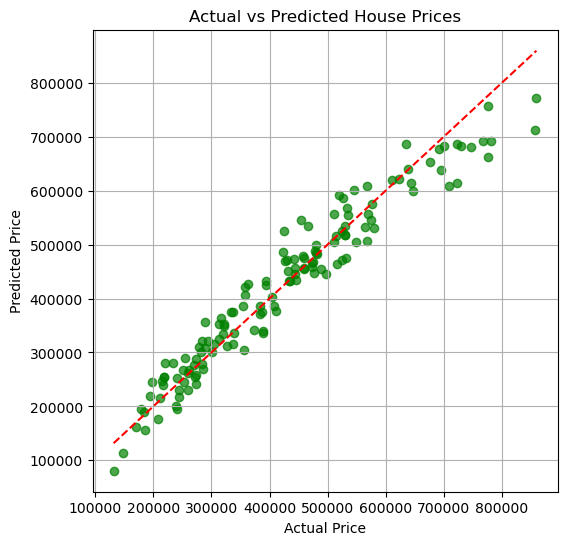

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"D:\task 4\house_prices.csv")

# Check column names
print("Actual columns:", df.columns.tolist())

# Rename columns if needed to standardize
df.rename(columns=lambda x: x.strip().title(), inplace=True)
df.rename(columns={"Room": "Rooms"}, inplace=True)

# Final check
print("Updated columns:", df.columns.tolist())

# Drop rows with missing values
df.dropna(inplace=True)

# Basic Info
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Stats:\n", df.describe())

# Plot distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Size'], kde=True)
plt.title("Distribution of House Size")

plt.subplot(1, 2, 2)
sns.histplot(df['Price'], kde=True)
plt.title("Distribution of House Price")
plt.tight_layout()
plt.show()

# Feature & Target
X = df.drop("Price", axis=1)
y = df["Price"]

# Preprocessing
numerical_features = ["Size", "Rooms"]
categorical_features = ["Location"]

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()
